In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import nbformat
from scipy.stats import gaussian_kde

# Financial Data

In [73]:
# read the data
df = pd.read_csv('../../data/processed/cdp_summary_processed_v2.csv')

In [74]:
df

,id,year,companyname,country,employees,mkt cap,tot assets,revenue,net income,roe,...,gind,continent,ghg_change_total,ghg_change_real,ghg_change_structure,ghg_change_measure,ghg_change_othergroup,ghg_change_nonzero_count,ghg_change_output,ghg_change_real_next
0,44,0.0,3i Group,United Kingdom,6.274762,22.158500,22.921164,20.579931,19.269494,1.980651,...,Financial Services,Europe,-11.00,-11.00,0.0,0.0,0.00,1.0,0.0,0.0
1,44,1.0,3i Group,United Kingdom,6.154858,22.239586,22.945632,20.250692,19.512860,1.915433,...,Financial Services,Europe,-25.00,0.00,0.0,0.0,-25.00,1.0,0.0,-1.0
2,44,2.0,3i Group,United Kingdom,6.159095,21.891776,22.720924,19.980845,NaN,NaN,...,Financial Services,Europe,-19.00,-1.00,0.0,-1.0,-17.00,3.0,0.0,0.0
3,44,3.0,3i Group,United Kingdom,5.883322,22.263379,22.602524,20.182098,19.443549,2.025718,...,Financial Services,Europe,-29.00,0.00,0.0,0.0,-29.00,1.0,0.0,0.0
4,44,5.0,3i Group,United Kingdom,5.605802,22.661978,22.707989,20.628547,20.759632,3.029143,...,Financial Services,Europe,-4.00,0.00,0.0,0.0,-4.00,1.0,0.0,-39.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18471,895173,11.0,Flex LNG Ltd.,Bermuda,2.197225,20.897261,21.668308,19.639055,18.888880,2.976529,...,Energy,North America,59.86,49.86,0.0,0.0,10.00,2.0,0.0,NaN
18472,895420,11.0,China Everbright Greentech Limited,Hong Kong,8.243019,20.470303,22.369891,20.803459,18.774355,2.245873,...,Utilities,Asia,12.55,0.00,0.0,0.0,12.55,1.0,0.0,NaN
18473,895480,11.0,Minerals Technologies Inc.,USA,8.284504,21.609885,21.932584,21.342928,18.917813,2.481537,...,Materials,North America,0.00,0.00,0.0,0.0,0.00,0.0,0.0,NaN
18474,895582,11.0,Sunway Berhad,Malaysia,9.295600,21.425642,22.516667,20.609316,20.276312,3.339459,...,Capital Goods,Asia,0.97,0.97,0.0,0.0,0.00,2.0,0.0,NaN


In [75]:
jet_blue_mkt_cap = df[df['companyname'] == 'Jetblue Airways Corporation']['mkt cap'].values[-1]
gm_mkt_cap = df[df['companyname'] == 'General Motors Company']['mkt cap'].values[-1]

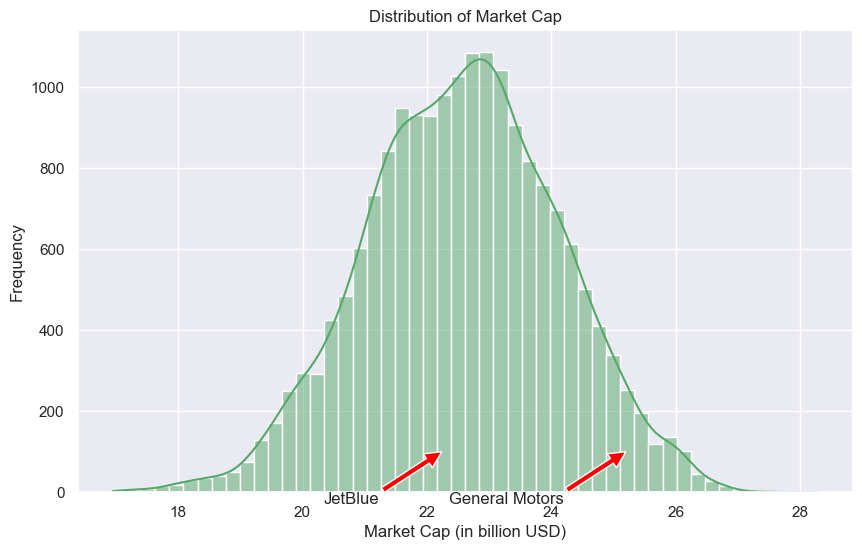

In [76]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['mkt cap'], kde=True, color='g', bins=50)
plt.title('Distribution of Market Cap')
plt.xlabel('Market Cap (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_mkt_cap, 100), xytext=(jet_blue_mkt_cap  - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_mkt_cap, 100), xytext=(gm_mkt_cap - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.show()

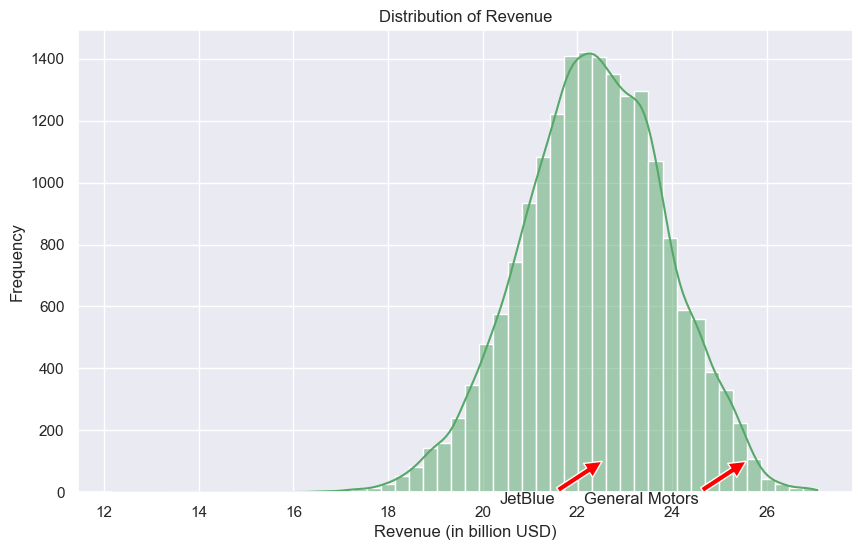

In [79]:
# do the same for revenue
jet_blue_revenue = df[df['companyname'] == 'Jetblue Airways Corporation']['revenue'].values[-1]
gm_revenue = df[df['companyname'] == 'General Motors Company']['revenue'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True, color='g', bins=50)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_revenue, 100), xytext=(jet_blue_revenue - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_revenue, 100), xytext=(gm_revenue - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.show()

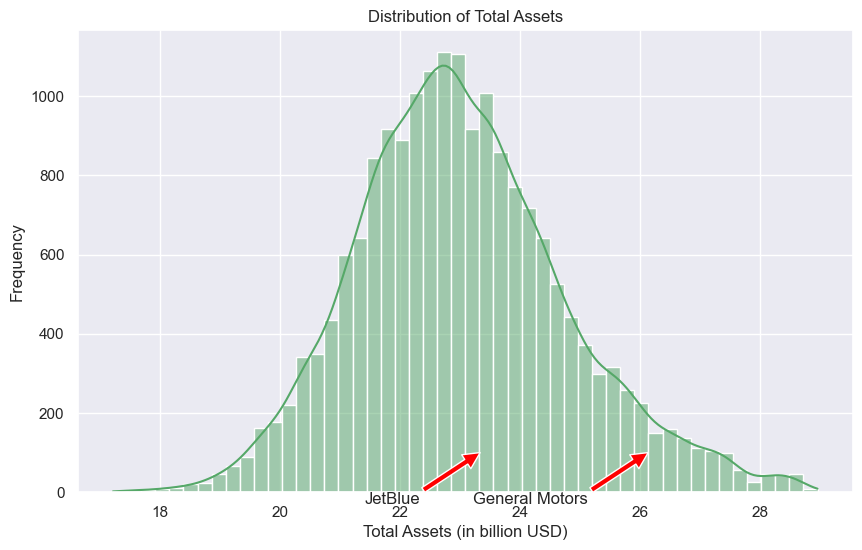

In [82]:
# do the same for tot assets
jet_blue_tot_assets = df[df['companyname'] == 'Jetblue Airways Corporation']['tot assets'].values[-1]
gm_tot_assets = df[df['companyname'] == 'General Motors Company']['tot assets'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['tot assets'], kde=True, color='g', bins=50)
plt.title('Distribution of Total Assets')
plt.xlabel('Total Assets (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_tot_assets, 100), xytext=(jet_blue_tot_assets - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_tot_assets, 100), xytext=(gm_tot_assets - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.show()

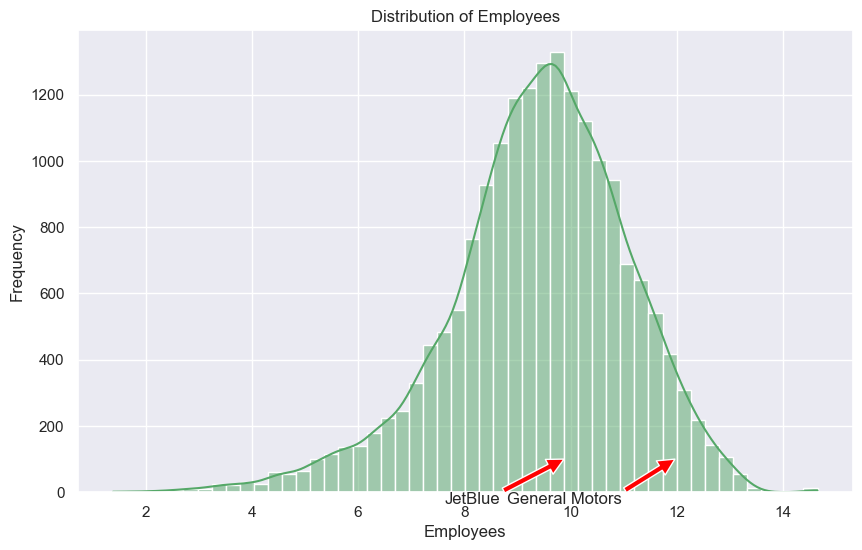

In [85]:
# do the same for employees
jet_blue_employees = df[df['companyname'] == 'Jetblue Airways Corporation']['employees'].values[-1]
gm_employees = df[df['companyname'] == 'General Motors Company']['employees'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['employees'], kde=True, color='g', bins=50)
plt.title('Distribution of Employees')
plt.xlabel('Employees')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_employees, 100), xytext=(jet_blue_employees - 1.2, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_employees, 100), xytext=(gm_employees - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.show()

In [ ]:
# do the same for net income

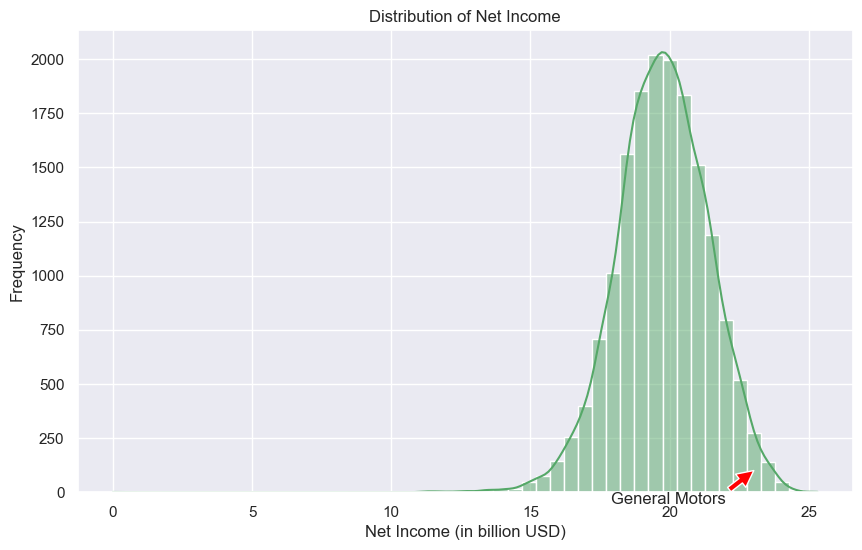

In [87]:
# do the same for net income
jet_blue_net_income = df[df['companyname'] == 'Jetblue Airways Corporation']['net income'].values[-1]
gm_net_income = df[df['companyname'] == 'General Motors Company']['net income'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['net income'], kde=True, color='g', bins=50)
plt.title('Distribution of Net Income')
plt.xlabel('Net Income (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_net_income, 100), xytext=(jet_blue_net_income - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_net_income, 100), xytext=(gm_net_income - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.show()